## Project for Advanced Data Science course
#### Loay Abdulatif & Sharef Mustafa


### We are investigating the possibility of detecting spam via meta data instead of disclosing the content of the message it self

### The motivation here is ethical , since usual anti spaming solutions will check the contents of the message it self and thus violating people privacy

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## we start with parsing the log of a mail server, as seen below this is a labled data since each row is representing an incoming email and the column 'Type' already classifies the email based on a commercial anti spam system

In [182]:
df = pd.read_csv('maildata.csv', error_bad_lines=False)
df.head(3)

,Date,Msg Id,Client Address,Type,Score,From,To,Subject,Size,Virus Details
0,5/11/2017 15:29,iJ1kYuEy-K0f,98.139.213.152,Clean,0.340,XXXXXXX@bellsouth.net,######@targetdomain.com,Second request كشف حساب ٢٠١٦,4331,NaN
1,5/11/2017 11:59,wXfZtBvH8F7S,98.139.213.148,Clean,-1.918,NaN,######@targetdomain.com,Delivery failure,5204,NaN
2,5/11/2017 15:15,POvVNhEZbKTS,98.138.121.119,Clean,-2.089,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4395,NaN


### pepare the data for modeling, "Client Address" text column will be replaced by 4 numerical
### columns representing the 4 octets of the IP address

In [183]:
from collections import Counter
import heapq

sendersFrequency = Counter(df['Client Address'])

df['Frequency']= pd.Series([ sendersFrequency[i] for i in df['Client Address'] ])

print('\n Number of total sender IP addresses is %s ' %len(sendersFrequency))

print('\n avg # of messages per sender is %s ' %np.mean( np.array( list(sendersFrequency.values() )  ) )) 

# find top 10 messages per sender 
topFrequencies = heapq.nlargest(10, list(sendersFrequency.values() ))

# the least amount of messages per sender in the top 10 
print('\nThe least frequency in the top 10 highest aenders is %s' %min(topFrequencies))

# find top 10 sender IP addresses
topSenders = [i for i in sendersFrequency.keys() if sendersFrequency[i]>min(topFrequencies) ]
print(topSenders)





 Number of total sender IP addresses is 547 

 avg # of messages per sender is 3.6563071298 

The least frequency in the top 10 highest aenders is 26
['185.18.254.52', '217.66.226.211', '213.244.116.212', '212.14.225.41', '217.66.226.23', '5.196.130.167', '212.14.225.42', '192.116.17.51', '82.213.33.184']


## check dns names of top sender IP addresses

In [184]:
import socket
for x in topSenders:
    try:
        hostname, aliases, hostip = socket.gethostbyaddr(x)
        print(x, hostname, sendersFrequency[x] )
    except:
        print(x, "No ptr record " , sendersFrequency[x] )

185.18.254.52 mail.ponyexpress.kz 77
217.66.226.211 No ptr record  81
213.244.116.212 gateway02.hulul.com 33
212.14.225.41 Gateway01.pgfoundation.ps 96
217.66.226.23 red.hadara.ps 65
5.196.130.167 smtp.ovh.ltutech.net 34
212.14.225.42 gateway02.paltel.net 96
192.116.17.51 dogbert.palnet.com 465
82.213.33.184 PTR01.reach.ps 90


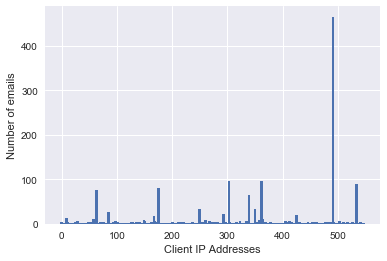

In [185]:
# indexes will facilitate in drawing as index of IP addresses
indexes = np.arange(len(sendersFrequency))

plt.bar(indexes, sendersFrequency.values() ,width=5)
#plt.xticks(indexes, sendersFrequency.keys())

plt.xlabel("Client IP Addresses")
plt.ylabel("Number of emails")
plt.show()

### replace Date column with 3 numerical column of Year, Month and Day

In [186]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
df['Day'] = pd.Series([ i.day for i in df['Date'] ])
df['Month'] = pd.Series([ i.month for i in df['Date'] ])
df['Year'] = pd.Series([ i.year for i in df['Date'] ])

df.drop('Date', 1, inplace=True )
df.head()


,Msg Id,Client Address,Type,Score,From,To,Subject,Size,Virus Details,Frequency,Day,Month,Year
0,iJ1kYuEy-K0f,98.139.213.152,Clean,0.340,XXXXXXX@bellsouth.net,######@targetdomain.com,Second request كشف حساب ٢٠١٦,4331,NaN,1,11,5,2017
1,wXfZtBvH8F7S,98.139.213.148,Clean,-1.918,NaN,######@targetdomain.com,Delivery failure,5204,NaN,1,11,5,2017
2,POvVNhEZbKTS,98.138.121.119,Clean,-2.089,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4395,NaN,2,11,5,2017
3,XC-dBX2umDuU,98.138.121.119,Clean,-2.089,sdfs@yahoo.com,######@targetdomain.com,970nnnnnnnn,4397,NaN,2,11,5,2017
4,7Uq1GwJynKMh,98.136.218.253,Clean,-4.508,XXXXXXX@yahoo.com,######@targetdomain.com,Re: رسالة قائمة المهنية,11114,NaN,1,11,5,2017


### drop irrelavent columns , also dropping 'Score' to avoid any correlation from it with the output

In [187]:
df.drop('Virus Details',1, inplace=True)
df.drop('Msg Id',1, inplace=True)
df.dropna()

df.drop('Score',1, inplace=True)

df.drop('Client Address',1, inplace=True)

df.drop('From',1, inplace=True)

df.drop('To',1, inplace=True)

# convert null subjects to a empty string
df.replace(np.nan, '', regex=True, inplace=True)

# drop subject
df.drop('Subject',1, inplace=True)

df.head(3)

,Type,Size,Frequency,Day,Month,Year
0,Clean,4331,1,11,5,2017
1,Clean,5204,1,11,5,2017
2,Clean,4395,2,11,5,2017


### prepare the target column 'Spam' by replacing text values with 0|1 representing Ham|Spam respectivly
### drop 'Type' column afterwarsd


In [188]:
df['Spam'] = pd.Series( [ 0 if(str(i)=='Clean' or str(i)=='Whitelisted') else 1 for i in df['Type'] ])
df.drop('Type',1, inplace=True) 
df.head(3)

,Size,Frequency,Day,Month,Year,Spam
0,4331,1,11,5,2017,0
1,5204,1,11,5,2017,0
2,4395,2,11,5,2017,0


## Splitting & Fitting using CrossValidation

In [189]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
# features
X = df.drop('Spam', 1)

# Target
y = df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X,y)


## Use KNN for classification

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train , y_train)
Y = knn.predict(X_test)
accuricy = metrics.accuracy_score(y_test, Y)
print (accuricy)

0.982


### to verify accuracy find best value for K

In [191]:
from sklearn.cross_validation import cross_val_score

In [192]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )

In [193]:
print(scores)

[ 0.9800995   0.98507463  0.84079602  1.          1.          0.995       1.
  1.          0.98492462  0.94472362]


In [194]:
print (scores.mean())

0.973061839046


In [195]:
kscores = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy' )
    kscores.append(scores.mean())
print(kscores)

[0.95404138853471332, 0.97354935123378072, 0.96706420160504014, 0.97655691392284805, 0.97306183904597598, 0.97555688892222303, 0.97406435160879012, 0.97705942648566213, 0.97556688917222922, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213, 0.97705942648566213]


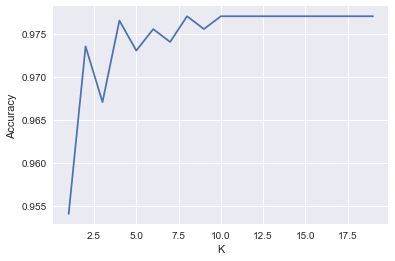

In [196]:
plt.plot(range(1,20) , kscores)
plt.xlabel("K")
plt.ylabel('Accuracy')

 ### we choose the value for k to be 10 for proper percentage of accuracy
 ### Next we can use Logistic Regression and compare results
 ### Or include the 'subject in the features and use MultinomialNB